#**-------------------------------------TRABALHO PST---------------------------------------**

## **NOTEBOOK 2 | Statistical Models - AutoARIMA**

**Realizado por:**
- David Carvalho, nº2242131
- Lígia Carteado Mena, nº2242194
- Rui Filipe Parada, nº2211025

---------------------------------------------------------
**Dataset escolhido:**
- Foods1_CA4 -> Departamento Foods1 da loja 4 do Estado da Califórnia

## **1. IMPORTS**

In [ ]:
!pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 6.1 MB/s eta 0:00:00


In [ ]:
import io
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import metrics

from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

from statsforecast import StatsForecast
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## **2. DATA UPLOAD | DIVISÃO TREINO E TESTE**

### Data upload: fazer upload dos ficheiros 'Foods1_CA4.csv' e 'results_PST1'

In [ ]:
uploaded = files.upload()

if 'Foods1_CA4.csv' in uploaded and 'results_PST1.csv' in uploaded:
    df = pd.read_csv(io.BytesIO(uploaded['Foods1_CA4.csv']), parse_dates=['ds'])
    Models_results = pd.read_csv(io.BytesIO(uploaded['results_PST1.csv']), sep=',')
    print("Both files uploaded successfully.")
else:
    print("Please ensure both 'Foods1_CA4.csv' and 'results_PST1.csv' are uploaded.")

df

Saving Foods1_CA4.csv to Foods1_CA4.csv
Saving results_PST1.csv to results_PST1.csv
Both files uploaded successfully.


,unique_id,ds,y
0,FOODS_1_001_CA_4,2011-01-30,1.0
1,FOODS_1_001_CA_4,2011-01-31,1.0
2,FOODS_1_001_CA_4,2011-02-01,1.0
3,FOODS_1_001_CA_4,2011-02-02,1.0
4,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
355368,FOODS_1_219_CA_4,2016-06-15,2.0
355369,FOODS_1_219_CA_4,2016-06-16,1.0
355370,FOODS_1_219_CA_4,2016-06-17,4.0
355371,FOODS_1_219_CA_4,2016-06-18,0.0


### Conjunto de treino e teste

In [ ]:
train = df[df['ds'] <= '2016-05-22']
train

,unique_id,ds,y
0,FOODS_1_001_CA_4,2011-01-30,1.0
1,FOODS_1_001_CA_4,2011-01-31,1.0
2,FOODS_1_001_CA_4,2011-02-01,1.0
3,FOODS_1_001_CA_4,2011-02-02,1.0
4,FOODS_1_001_CA_4,2011-02-03,1.0
...,...,...,...
355340,FOODS_1_219_CA_4,2016-05-18,3.0
355341,FOODS_1_219_CA_4,2016-05-19,2.0
355342,FOODS_1_219_CA_4,2016-05-20,2.0
355343,FOODS_1_219_CA_4,2016-05-21,6.0


In [ ]:
test = df[df['ds'] > '2016-05-22'].rename(columns={'y': 'y_test'})
test

,unique_id,ds,y_test
1940,FOODS_1_001_CA_4,2016-05-23,2.0
1941,FOODS_1_001_CA_4,2016-05-24,0.0
1942,FOODS_1_001_CA_4,2016-05-25,0.0
1943,FOODS_1_001_CA_4,2016-05-26,6.0
1944,FOODS_1_001_CA_4,2016-05-27,0.0
...,...,...,...
355368,FOODS_1_219_CA_4,2016-06-15,2.0
355369,FOODS_1_219_CA_4,2016-06-16,1.0
355370,FOODS_1_219_CA_4,2016-06-17,4.0
355371,FOODS_1_219_CA_4,2016-06-18,0.0


In [ ]:
train.shape, test.shape

((349325, 3), (6048, 3))

## **3. ANÁLISE DE DADOS EXPLORATÓRIA**

### Explorar dados - ACF e PACF (análise especial para o modelo AutoARIMA)

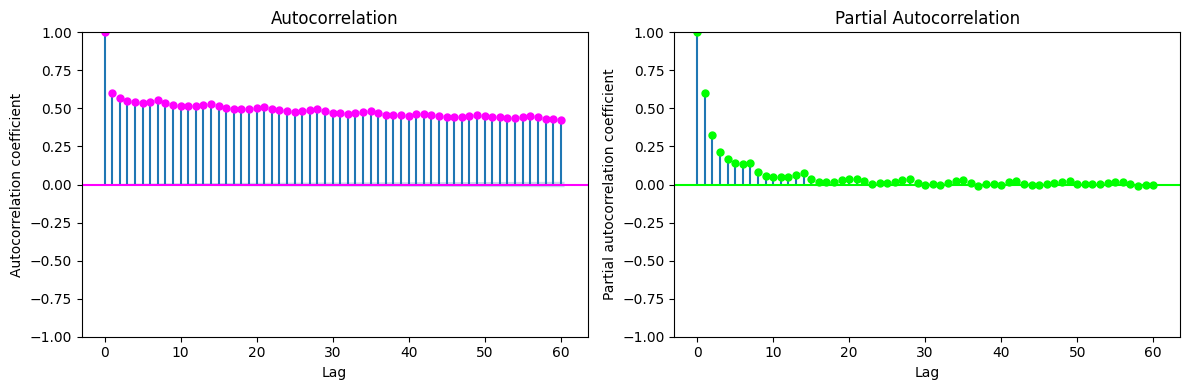

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

plot_acf(train["y"], lags=60, ax=axs[0], color="fuchsia")
axs[0].set_title("Autocorrelation")
axs[0].set_xlabel("Lag")
axs[0].set_ylabel("Autocorrelation coefficient")

plot_pacf(train["y"], lags=60, ax=axs[1], color="lime")
axs[1].set_title("Partial Autocorrelation")
axs[1].set_xlabel("Lag")
axs[1].set_ylabel("Partial autocorrelation coefficient")

plt.tight_layout()
plt.show()

**Análise do ACF**

Existe um decaimento muito suave, com autocorrelações positivas e significativas até lag 60.

Isto sugere que a série tem alta persistência ou componente de tendência. Pode haver não-estacionariedade, pois a autocorrelação não decai rapidamente para zero.

Pode existir sazonalidade fraca ou ausente (não se vêem picos claros, como por exemplo a cada 7 lags para sazonalidade semanal).

**Análise do PACF**

Forte pico no lag 1, depois uma queda rápida e aproximação a zero.

Isso indica uma dependência principalmente de curto prazo. Os valores seguintes são pequenos e pouco diferentes de zero, indicando que lags superiores não acrescentarão muita explicação.

## **4. MODELING**

### Dataset parameters

In [ ]:
freq = 'D'
season_length = 7
horizon = 28

### Instanciar modelos

O modelo a usar vai ser o AutoARIMA, que automatiza a escolha dos parâmetros do modelo ARIMA.

In [ ]:
models = [AutoARIMA(season_length=season_length)]

In [ ]:
sf = StatsForecast(
    models=models,
    freq=freq,
    n_jobs=-1
    )

In [ ]:
sf.fit(train)

StatsForecast(models=[AutoARIMA])

In [ ]:
arima_string(sf.fitted_[0,0].model_)

'ARIMA(0,1,1)(1,0,1)[7]                   '

Componentes do modelo

1 - Parte não-sazonal: ARIMA(p, d, q)

    p = 0: sem componente autorregressiva (AR)

    d = 1: a série é diferenciada uma vez (remoção de tendência → torna a série estacionária)

    q = 1: inclui uma média móvel (MA) de ordem 1 → o modelo depende do erro/resíduo anterior

2 -  Parte sazonal: (P, D, Q)[s]

     P = 1: componente autorregressiva sazonal de ordem 1

     D = 0: sem diferenciação sazonal (assume que a sazonalidade está estática)

     Q = 1: média móvel sazonal de ordem 1

     s = 7: sazonalidade semanal

In [ ]:
result = sf.fitted_[0,0].model_

In [ ]:
residual = pd.DataFrame(result.get("residuals"), columns=["residuals ARIMA"])
residual

,residuals ARIMA
0,9.999990e-04
1,6.981937e-07
2,4.028884e-07
3,2.846583e-07
4,2.202614e-07
...,...
1935,7.820138e-01
1936,7.608032e-01
1937,-2.828973e-01
1938,-2.261164e-01


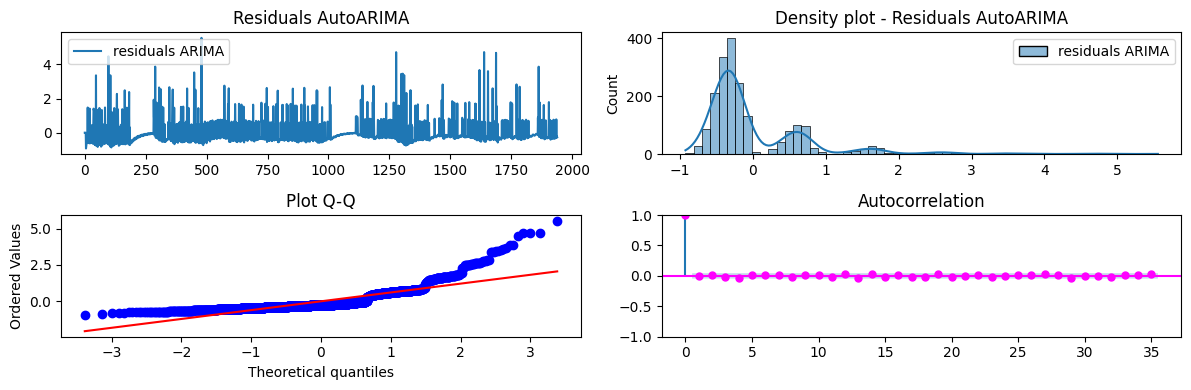

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))

residual.plot(ax=axs[0,0])
axs[0,0].set_title("Residuals AutoARIMA");

sns.histplot(residual, kde=True, ax=axs[0,1])
axs[0,1].set_title("Density plot - Residuals AutoARIMA");

stats.probplot(residual["residuals ARIMA"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

plot_acf(residual, lags=35, ax=axs[1,1], color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.tight_layout()
plt.show();

Análise dos resíduos do modelo AutoARIMA

1. Resíduos ao longo do tempo

Os resíduos parecem centrados em torno de zero, o que é bom. Contudo, existem vários picos e variação de amplitude, sugerindo heterocedasticidade (variância não constante ao longo do tempo). Possível presença de outliers ou valores atípicos (picos altos).

2. Densidade

A distribuição está desviada à direita (assimetria positiva). Há uma cauda longa (valores mais altos) → sinal de que o modelo pode não capturar bem alguns picos.

3. Q-Q plot

Os pontos desviam-se bastante da linha vermelha, especialmente nas extremidades.
Confirma a não-normalidade dos resíduos, com valores extremos mais frequentes do que o esperado.
Isto pode afetar os testes estatísticos baseados na suposição de normalidade.

4. Autocorrelação dos resíduos

Os lags parecem estar dentro dos limites de confiança. Não há autocorrelação significativa.

In [ ]:
forecasts = sf.forecast(df=train, h=horizon)
forecasts

,unique_id,ds,AutoARIMA
0,FOODS_1_001_CA_4,2016-05-23,0.325913
1,FOODS_1_001_CA_4,2016-05-24,0.237925
2,FOODS_1_001_CA_4,2016-05-25,0.317922
3,FOODS_1_001_CA_4,2016-05-26,0.318440
4,FOODS_1_001_CA_4,2016-05-27,0.273276
...,...,...,...
6043,FOODS_1_219_CA_4,2016-06-15,1.985761
6044,FOODS_1_219_CA_4,2016-06-16,1.900768
6045,FOODS_1_219_CA_4,2016-06-17,1.855833
6046,FOODS_1_219_CA_4,2016-06-18,2.101219


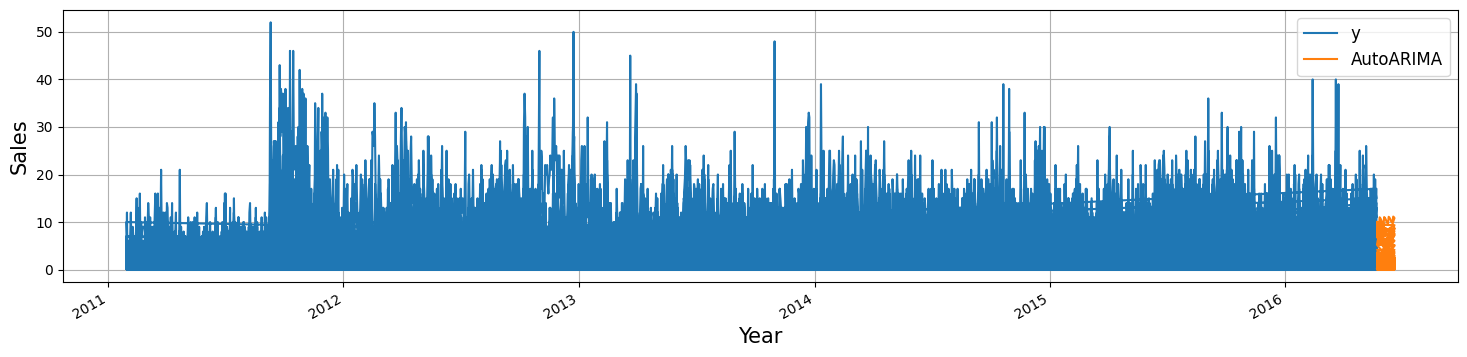

,unique_id,ds,y_test,AutoARIMA
0,FOODS_1_001_CA_4,2016-05-23,2.0,0.325913
1,FOODS_1_001_CA_4,2016-05-24,0.0,0.237925
2,FOODS_1_001_CA_4,2016-05-25,0.0,0.317922
3,FOODS_1_001_CA_4,2016-05-26,6.0,0.318440
4,FOODS_1_001_CA_4,2016-05-27,0.0,0.273276
...,...,...,...,...
6043,FOODS_1_219_CA_4,2016-06-15,2.0,1.985761
6044,FOODS_1_219_CA_4,2016-06-16,1.0,1.900768
6045,FOODS_1_219_CA_4,2016-06-17,4.0,1.855833
6046,FOODS_1_219_CA_4,2016-06-18,0.0,2.101219


In [ ]:
# Aqui faz uma junçao dos valores reais vs os previstos para os 28 dias posteriores

forecasts = test.merge(forecasts, how='left', on=['unique_id', 'ds'])

fig, ax = plt.subplots(1, 1, figsize = (18, 4))
plot_df = pd.concat([train, forecasts]).set_index('ds')
plot_df[['y', 'AutoARIMA']].plot(ax=ax)

ax.set_title('', fontsize=20)
ax.set_ylabel('Sales', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.legend(prop={'size': 12})
ax.grid(True)

plt.show()

forecasts

In [ ]:
cv_arima = sf.cross_validation(df=train,
                               h=horizon,
                               n_windows=1,
                               step_size=horizon)

cv_arima

,unique_id,ds,cutoff,y,AutoARIMA
0,FOODS_1_001_CA_4,2016-04-25,2016-04-24,0.0,0.408570
1,FOODS_1_001_CA_4,2016-04-26,2016-04-24,1.0,0.314653
2,FOODS_1_001_CA_4,2016-04-27,2016-04-24,0.0,0.365138
3,FOODS_1_001_CA_4,2016-04-28,2016-04-24,0.0,0.366938
4,FOODS_1_001_CA_4,2016-04-29,2016-04-24,0.0,0.368287
...,...,...,...,...,...
6043,FOODS_1_219_CA_4,2016-05-18,2016-04-24,3.0,1.442023
6044,FOODS_1_219_CA_4,2016-05-19,2016-04-24,2.0,1.338354
6045,FOODS_1_219_CA_4,2016-05-20,2016-04-24,2.0,1.373456
6046,FOODS_1_219_CA_4,2016-05-21,2016-04-24,6.0,1.364845


## **5. ANÁLISE DAS MÉTRICAS**

In [ ]:
def rmsse(y, y_hat, y_train, seasonality):
    delta_y = (y - y_hat) ** 2
    delta_y = np.average(delta_y)
    scale = (y_train[:-seasonality] - y_train[seasonality:]) ** 2
    scale = np.average(scale)
    rmsse = np.sqrt(delta_y / scale)
    return rmsse

def mase(y, y_hat, y_train, seasonality):
    delta_y = abs(y - y_hat)
    delta_y = np.average(delta_y)
    scale = abs(y_train[:-seasonality] - y_train[seasonality:])
    scale = np.average(scale)
    mase = delta_y / scale
    return mase

def model_evaluation(y_hist, y_true, y_pred, Model, seasonality):

    results_row = [{"Model": Model,
                    "MSE": metrics.mean_squared_error(y_true, y_pred),
                    "MAE": metrics.mean_absolute_error(y_true, y_pred),
                    "RMSE": np.sqrt(metrics.mean_squared_error(y_true, y_pred)),
                    "RMSSE": rmsse(y_true.values, y_pred.values, y_hist.values, seasonality=seasonality),
                    "MASE": mase(y_true.values, y_pred.values, y_hist.values, seasonality=seasonality)
                   }]

    results = pd.DataFrame.from_records(results_row)
    return results

In [ ]:
### FAZER DOWNLOAD DO FICHEIRO 'results_PST2.csv' NA ABA FICHEIROS DO COLAB ###

new_result = model_evaluation(train["y"], test["y_test"], forecasts["AutoARIMA"], "AutoARIMA", season_length)

Models_results = pd.concat([Models_results, new_result], ignore_index=True)

Models_results.to_csv("results_PST2.csv", index=False)

Models_results

,Model,MSE,MAE,RMSE,RMSSE,MASE
0,Seasonal Naive,4.866237,1.268023,2.205955,1.055169,1.228272
1,Historic Average,3.181790,1.069713,1.783757,0.853221,1.036179
2,AutoARIMA,2.778064,1.043241,1.666753,0.797254,1.010537


O modelo AutoARIMA tem desempenho superior aos restante modelos em todas as métricas.

O Seasonal Naive é o modelo mais fraco. O modelo Historic Average é intermédio.

### Plot das previsões

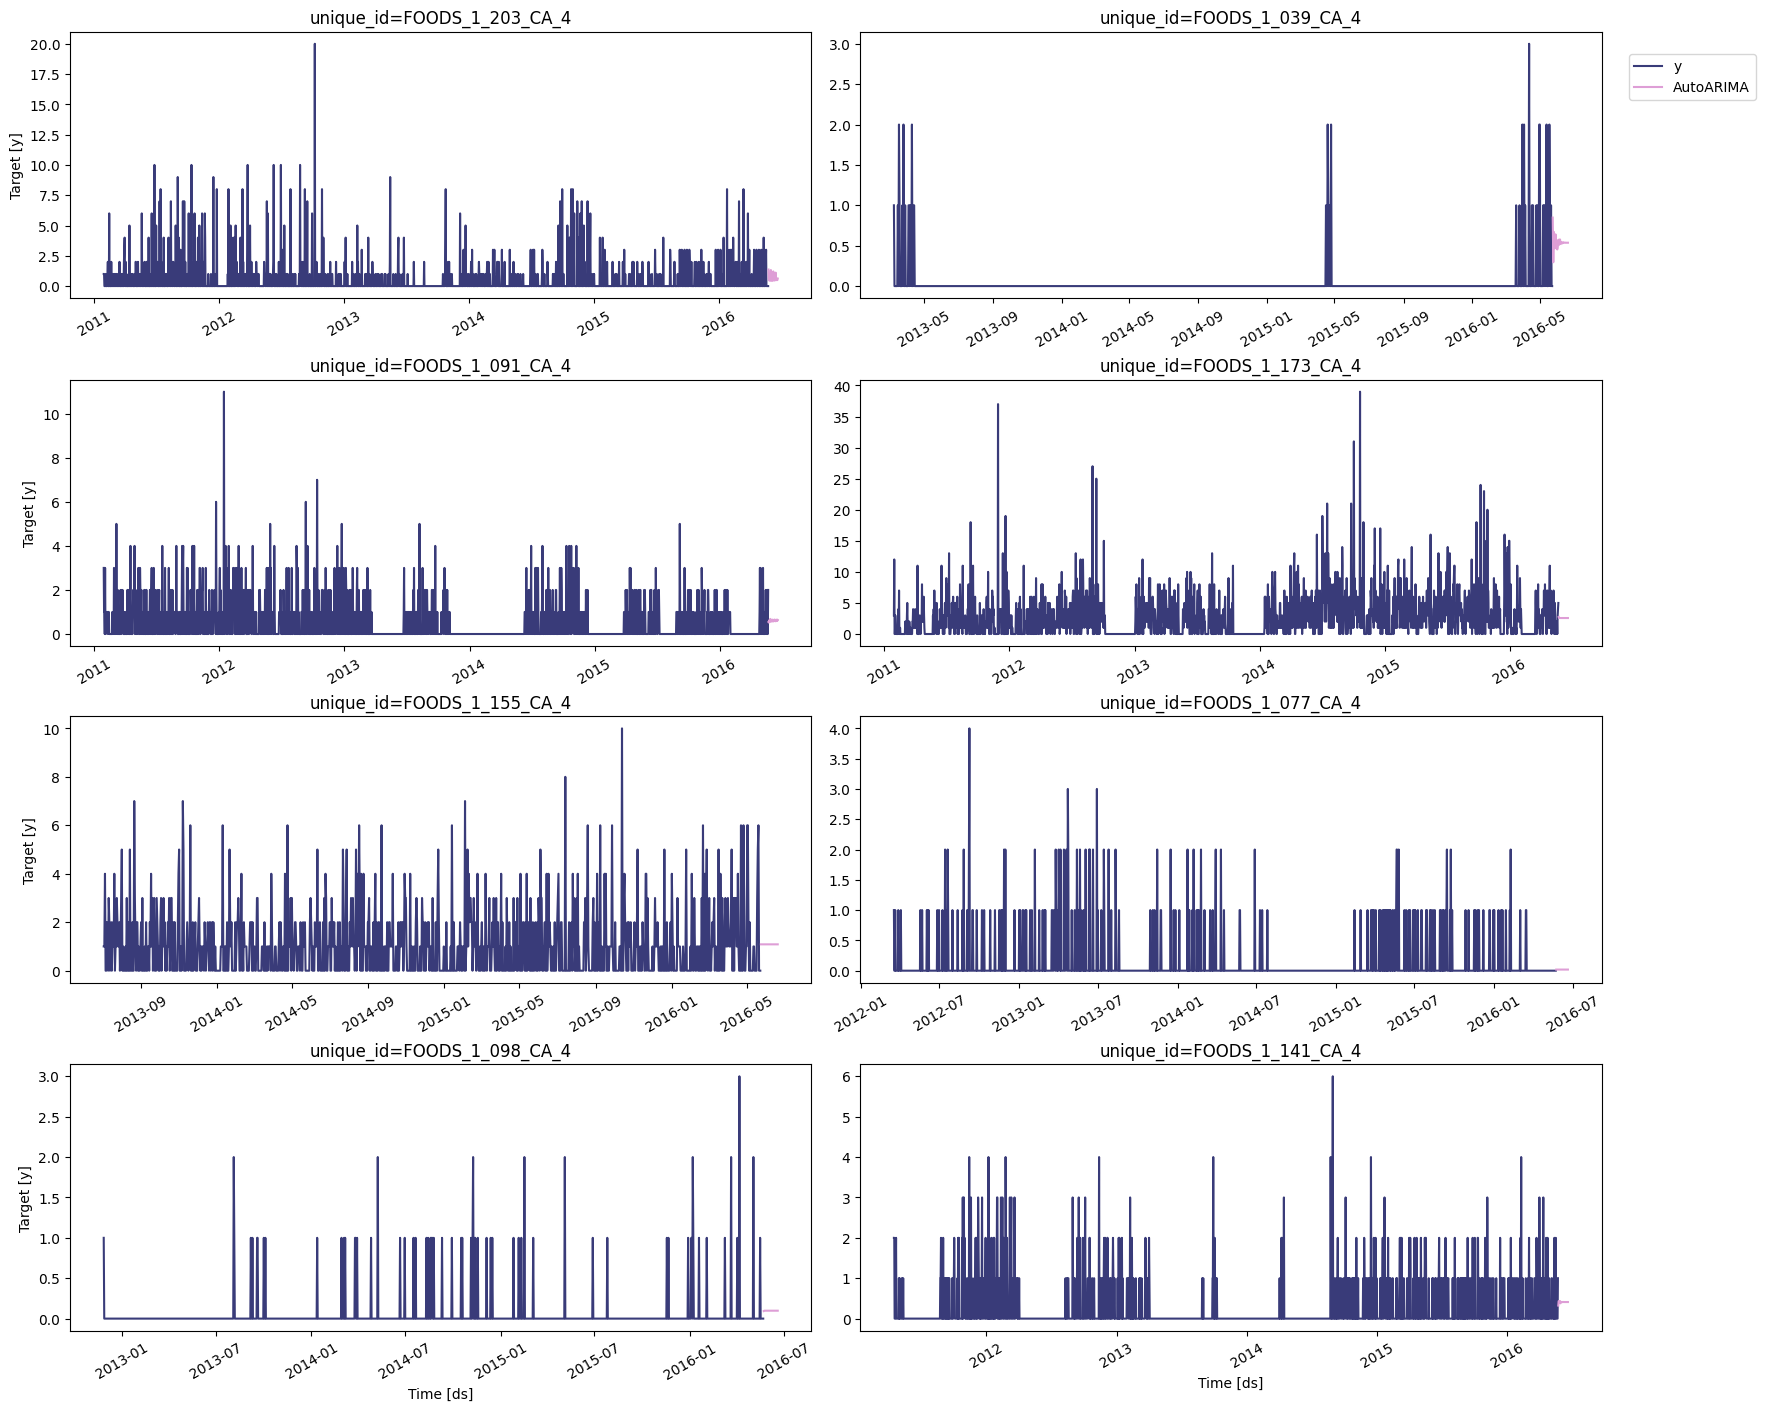

In [ ]:
sf.plot(train, forecasts, models=['AutoARIMA'])